In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_partidos = pd.read_csv("./data/partidos_cebollitas.csv")

df_partidos.head()

df_partidos.info()

df_partidos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha_partido           100 non-null    object
 1   equipo_local            100 non-null    object
 2   equipo_visitante        100 non-null    object
 3   goles_local             100 non-null    int64 
 4   goles_visitante         100 non-null    int64 
 5   posesion_local (%)      100 non-null    int64 
 6   posesion_visitante (%)  100 non-null    int64 
 7   tiros_arco_local        100 non-null    int64 
 8   tiros_arco_visitante    100 non-null    int64 
 9   estadio                 100 non-null    object
dtypes: int64(6), object(4)
memory usage: 7.9+ KB


,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.63000,2.540000,50.250000,49.750000,7.580000,7.870000
std,1.58691,1.788967,6.035878,6.035878,2.899599,2.966667
min,0.00000,0.000000,40.000000,40.000000,3.000000,3.000000
25%,1.00000,1.000000,45.000000,44.750000,5.000000,5.000000
50%,3.00000,3.000000,51.000000,49.000000,7.500000,8.000000
75%,4.00000,4.000000,55.250000,55.000000,10.000000,11.000000
max,5.00000,5.000000,60.000000,60.000000,12.000000,12.000000


In [2]:
df_partidos["diferencia_goles"] = df_partidos["goles_local"] - df_partidos["goles_visitante"]
df_partidos["diferencia_goles"].head(9)

0    2
1   -4
2    1
3   -1
4    2
5    0
6    3
7   -1
8   -4
Name: diferencia_goles, dtype: int64

In [4]:
df_partidos["ratio_tiros_posesion_local"] = df_partidos["tiros_arco_local"] / df_partidos["posesion_local (%)"]

df_partidos[["tiros_arco_local", "posesion_local (%)", "ratio_tiros_posesion_local"]].head(9)

,tiros_arco_local,posesion_local (%),ratio_tiros_posesion_local
0,12,54,0.222222
1,12,60,0.200000
2,10,55,0.181818
3,3,57,0.052632
4,7,52,0.134615
5,8,60,0.133333
6,4,49,0.081633
7,5,56,0.089286
8,9,60,0.150000


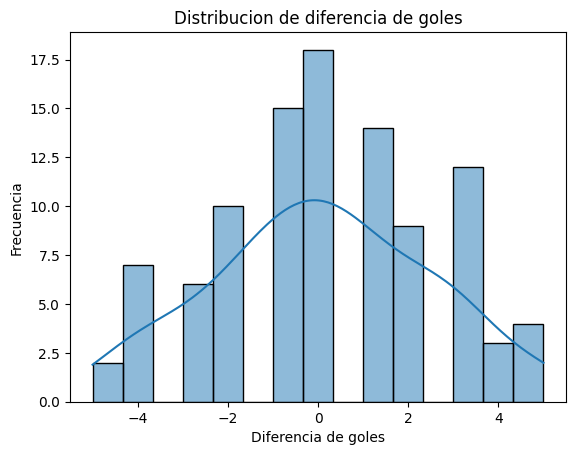

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_partidos["diferencia_goles"], bins=15, kde=True)
plt.title("Distribucion de diferencia de goles")
plt.xlabel("Diferencia de goles")
plt.ylabel("Frecuencia")
plt.show()

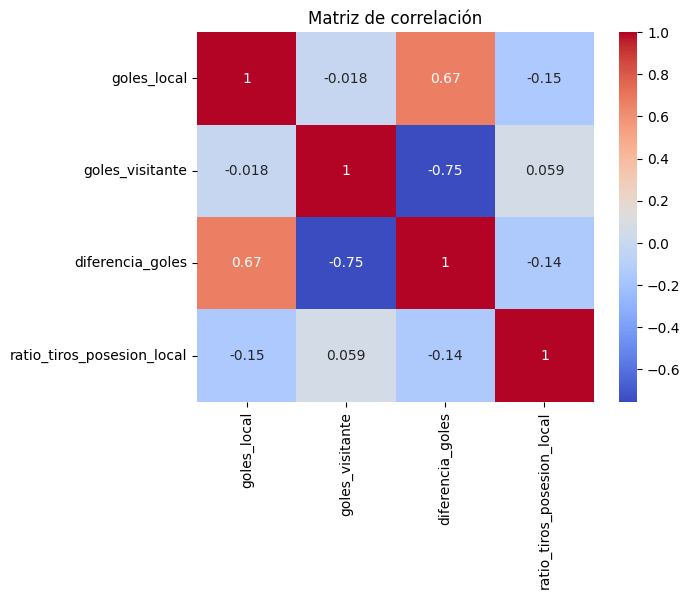

In [7]:
corr_var = ["goles_local", "goles_visitante", "diferencia_goles", "ratio_tiros_posesion_local"]

sns.heatmap(df_partidos[corr_var].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()